In [1]:
from generators.brownian_motion_generator import BrownianMotionDataset
from generators.poisson_process_generator import PoissonProcessDataset
from models.vanilla_transformer import TransformerModel
from probes.linear_probe import LinearProbe
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score


checkpoint_path = "/home/wojciech/private/magisterka/TFTS/training/transformer_stochastic_processes/8m8gd9lj/checkpoints/transformer-epoch=996-val_loss=0.10.ckpt"

# Load the trained model
model = TransformerModel.load_from_checkpoint(checkpoint_path)

/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [15]:
means_scores = []
std_scores = []
for i in range(20):
    # Create the DataLoader for evaluation
    val_loader = BrownianMotionDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=100, ranges={"means": (-i*2, i*2), "std": (0.5, 10)}).get_dataloader()
    # Initialize the linear probe with the transformer model
    probe = LinearProbe(model_path=checkpoint_path, input_dim=128, output_dim=2)  # Assuming `d_model` is 128
    # Fine-tune the linear probe using the training data (optional)
    # If needed, create a train_loader like val_loader and call finetune
    train_loader = BrownianMotionDataset(batch_size=16, series_length=1000, subseries_length=50, stride=50, intensity_count=500).get_dataloader()
    probe.finetune(train_loader, num_epochs=10)
    val_loss, predictions, labels = probe.evaluate(val_loader)
    means_scores.append(r2_score(labels[:, 0], predictions[:, 0]))
    std_scores.append(r2_score(labels[:, 1], predictions[:, 1]))

/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 13.8805
Epoch 2/10 - Loss: 9.8998
Epoch 3/10 - Loss: 7.1025
Epoch 4/10 - Loss: 5.2212
Epoch 5/10 - Loss: 3.9979
Epoch 6/10 - Loss: 3.2363
Epoch 7/10 - Loss: 2.7450
Epoch 8/10 - Loss: 2.4567
Epoch 9/10 - Loss: 2.2606
Epoch 10/10 - Loss: 2.1344
Validation MSE: 2.3899
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 14.8665
Epoch 2/10 - Loss: 10.7413
Epoch 3/10 - Loss: 7.7477
Epoch 4/10 - Loss: 5.7102
Epoch 5/10 - Loss: 4.3508
Epoch 6/10 - Loss: 3.4767
Epoch 7/10 - Loss: 2.9203
Epoch 8/10 - Loss: 2.5762
Epoch 9/10 - Loss: 2.3733
Epoch 10/10 - Loss: 2.2055
Validation MSE: 3.2974
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 15.4285
Epoch 2/10 - Loss: 11.1159
Epoch 3/10 - Loss: 8.0361
Epoch 4/10 - Loss: 5.9110
Epoch 5/10 - Loss: 4.4764
Epoch 6/10 - Loss: 3.5573
Epoch 7/10 - Loss: 2.9842
Epoch 8/10 - Loss: 2.6205
Epoch 9/10 - Loss: 2.3885
Epoch 10/10 - Loss: 2.2371
Validation MSE: 5.2146
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 15.7426
Epoch 2/10 - Loss: 11.4688
Epoch 3/10 - Loss: 8.3500
Epoch 4/10 - Loss: 6.1929
Epoch 5/10 - Loss: 4.7402
Epoch 6/10 - Loss: 3.7955
Epoch 7/10 - Loss: 3.1758
Epoch 8/10 - Loss: 2.7816
Epoch 9/10 - Loss: 2.5228
Epoch 10/10 - Loss: 2.3309
Validation MSE: 9.1714
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 14.4270
Epoch 2/10 - Loss: 10.3833
Epoch 3/10 - Loss: 7.5092
Epoch 4/10 - Loss: 5.5307
Epoch 5/10 - Loss: 4.2330
Epoch 6/10 - Loss: 3.4166
Epoch 7/10 - Loss: 2.9143
Epoch 8/10 - Loss: 2.6078
Epoch 9/10 - Loss: 2.3968
Epoch 10/10 - Loss: 2.2426
Validation MSE: 13.5569


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 15.1364
Epoch 2/10 - Loss: 10.9134
Epoch 3/10 - Loss: 7.8934
Epoch 4/10 - Loss: 5.8360
Epoch 5/10 - Loss: 4.4472
Epoch 6/10 - Loss: 3.5767
Epoch 7/10 - Loss: 3.0130
Epoch 8/10 - Loss: 2.6598
Epoch 9/10 - Loss: 2.4476
Epoch 10/10 - Loss: 2.2776
Validation MSE: 19.9941
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 14.9294
Epoch 2/10 - Loss: 10.6968
Epoch 3/10 - Loss: 7.6822
Epoch 4/10 - Loss: 5.6176
Epoch 5/10 - Loss: 4.2614
Epoch 6/10 - Loss: 3.3946
Epoch 7/10 - Loss: 2.8592
Epoch 8/10 - Loss: 2.5094
Epoch 9/10 - Loss: 2.2844
Epoch 10/10 - Loss: 2.1489
Validation MSE: 24.7943
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 15.6448
Epoch 2/10 - Loss: 11.3255
Epoch 3/10 - Loss: 8.2003
Epoch 4/10 - Loss: 6.0535
Epoch 5/10 - Loss: 4.5887
Epoch 6/10 - Loss: 3.6558
Epoch 7/10 - Loss: 3.0778
Epoch 8/10 - Loss: 2.6954
Epoch 9/10 - Loss: 2.4606
Epoch 10/10 - Loss: 2.3035
Validation MSE: 38.7318
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 14.6005
Epoch 2/10 - Loss: 10.5007
Epoch 3/10 - Loss: 7.6096
Epoch 4/10 - Loss: 5.6466
Epoch 5/10 - Loss: 4.3541
Epoch 6/10 - Loss: 3.5314
Epoch 7/10 - Loss: 3.0304
Epoch 8/10 - Loss: 2.7298
Epoch 9/10 - Loss: 2.5111
Epoch 10/10 - Loss: 2.3775
Validation MSE: 44.8752
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 14.9845
Epoch 2/10 - Loss: 10.7336
Epoch 3/10 - Loss: 7.7064
Epoch 4/10 - Loss: 5.6197
Epoch 5/10 - Loss: 4.2309
Epoch 6/10 - Loss: 3.3470
Epoch 7/10 - Loss: 2.8135
Epoch 8/10 - Loss: 2.4688
Epoch 9/10 - Loss: 2.2468
Epoch 10/10 - Loss: 2.1154
Validation MSE: 59.2284
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 15.8449
Epoch 2/10 - Loss: 11.4121
Epoch 3/10 - Loss: 8.2184
Epoch 4/10 - Loss: 5.9861
Epoch 5/10 - Loss: 4.4729
Epoch 6/10 - Loss: 3.5085
Epoch 7/10 - Loss: 2.8862
Epoch 8/10 - Loss: 2.5193
Epoch 9/10 - Loss: 2.2990
Epoch 10/10 - Loss: 2.0920
Validation MSE: 69.2932


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 15.3738
Epoch 2/10 - Loss: 11.0725
Epoch 3/10 - Loss: 8.0070
Epoch 4/10 - Loss: 5.8841
Epoch 5/10 - Loss: 4.4683
Epoch 6/10 - Loss: 3.5729
Epoch 7/10 - Loss: 2.9782
Epoch 8/10 - Loss: 2.6435
Epoch 9/10 - Loss: 2.4070
Epoch 10/10 - Loss: 2.2509
Validation MSE: 85.4758


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 14.3486
Epoch 2/10 - Loss: 10.2115
Epoch 3/10 - Loss: 7.2965
Epoch 4/10 - Loss: 5.3160
Epoch 5/10 - Loss: 4.0194
Epoch 6/10 - Loss: 3.2101
Epoch 7/10 - Loss: 2.7195
Epoch 8/10 - Loss: 2.4072
Epoch 9/10 - Loss: 2.1799
Epoch 10/10 - Loss: 2.0422
Validation MSE: 101.9955


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 14.5719
Epoch 2/10 - Loss: 10.3649
Epoch 3/10 - Loss: 7.4295
Epoch 4/10 - Loss: 5.4296
Epoch 5/10 - Loss: 4.1326
Epoch 6/10 - Loss: 3.3059
Epoch 7/10 - Loss: 2.8024
Epoch 8/10 - Loss: 2.4765
Epoch 9/10 - Loss: 2.2855
Epoch 10/10 - Loss: 2.1537
Validation MSE: 126.9127
Probe device: cuda:0
Transformer device: cuda:0


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch 1/10 - Loss: 14.2178
Epoch 2/10 - Loss: 10.1687
Epoch 3/10 - Loss: 7.3455
Epoch 4/10 - Loss: 5.4394
Epoch 5/10 - Loss: 4.2194
Epoch 6/10 - Loss: 3.4431
Epoch 7/10 - Loss: 2.9440
Epoch 8/10 - Loss: 2.6240
Epoch 9/10 - Loss: 2.4371
Epoch 10/10 - Loss: 2.2833
Validation MSE: 117.9013


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 15.0639
Epoch 2/10 - Loss: 10.8849
Epoch 3/10 - Loss: 7.9092
Epoch 4/10 - Loss: 5.8940
Epoch 5/10 - Loss: 4.5635
Epoch 6/10 - Loss: 3.6915
Epoch 7/10 - Loss: 3.1812
Epoch 8/10 - Loss: 2.8438
Epoch 9/10 - Loss: 2.6106
Epoch 10/10 - Loss: 2.4570
Validation MSE: 175.1407


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 14.7366
Epoch 2/10 - Loss: 10.5957
Epoch 3/10 - Loss: 7.6563
Epoch 4/10 - Loss: 5.6291
Epoch 5/10 - Loss: 4.2939
Epoch 6/10 - Loss: 3.4720
Epoch 7/10 - Loss: 2.9402
Epoch 8/10 - Loss: 2.6108
Epoch 9/10 - Loss: 2.4001
Epoch 10/10 - Loss: 2.2234
Validation MSE: 186.6903


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 14.2151
Epoch 2/10 - Loss: 10.1429
Epoch 3/10 - Loss: 7.2616
Epoch 4/10 - Loss: 5.3167
Epoch 5/10 - Loss: 4.0395
Epoch 6/10 - Loss: 3.2402
Epoch 7/10 - Loss: 2.7512
Epoch 8/10 - Loss: 2.4196
Epoch 9/10 - Loss: 2.2371
Epoch 10/10 - Loss: 2.0997
Validation MSE: 180.3197


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 13.7992
Epoch 2/10 - Loss: 9.7530
Epoch 3/10 - Loss: 6.9219
Epoch 4/10 - Loss: 5.0375
Epoch 5/10 - Loss: 3.8247
Epoch 6/10 - Loss: 3.0624
Epoch 7/10 - Loss: 2.5769
Epoch 8/10 - Loss: 2.3105
Epoch 9/10 - Loss: 2.1270
Epoch 10/10 - Loss: 1.9689
Validation MSE: 223.3820


/home/wojciech/anaconda3/envs/TFTS/lib/python3.10/site-packages/torch/nn/modules/transformer.py:307: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Probe device: cuda:0
Transformer device: cuda:0
Epoch 1/10 - Loss: 15.4739
Epoch 2/10 - Loss: 11.1936
Epoch 3/10 - Loss: 8.1260
Epoch 4/10 - Loss: 6.0115
Epoch 5/10 - Loss: 4.6198
Epoch 6/10 - Loss: 3.7110
Epoch 7/10 - Loss: 3.1138
Epoch 8/10 - Loss: 2.7533
Epoch 9/10 - Loss: 2.4964
Epoch 10/10 - Loss: 2.3581
Validation MSE: 226.2532


In [19]:
import numpy as np

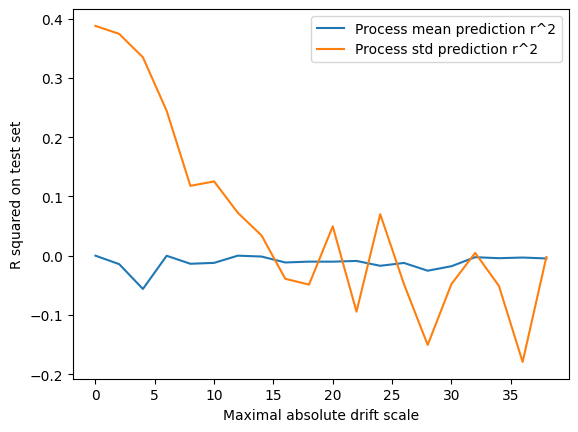

In [24]:
plt.plot(np.array(range(20)) * 2, means_scores, label="Process mean prediction r^2")
plt.plot(np.array(range(20)) * 2, std_scores, label="Process std prediction r^2")
plt.xlabel("Maximal absolute drift scale")
plt.ylabel("R squared on test set")
plt.legend()